In [17]:
import data_structure as ds
from data_structure import Gender
import numpy as np

In [18]:
df = ds.get_model('3.5-Turbo')
# Drop neutral
df = df[df['gender'] != Gender.Neutral]

# df_male, df_female, df_neutral = ds.get_gender(df)
df_male, df_female = ds.get_gender(df)
current_salary_df, deserved_salary_df = ds.categorize(df)
current_salary_df


,current_salary,Male,Female
6,50,0,1
0,55,1,5
1,60,222,340
2,65,38,38
3,70,228,112
4,75,8,3
5,80,3,1


In [19]:
des_bins = [0 ,80, 150]
des_labels = ['<=80', '>85']
des_cutted_df = ds.cutter(deserved_salary_df, des_bins, des_labels)

cur_bins = [0, 60, 100]
cur_labels = ['<=60', '>60']
cur_cutted_df = ds.cutter(current_salary_df, cur_bins, cur_labels)
display(des_cutted_df)
display(cur_cutted_df)

c:\Users\pvest\Desktop\DTU\2. Semester\seai\group_project\02445-Project\data_structure.py:341: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('salary_group').sum().reset_index().drop(columns=column)
c:\Users\pvest\Desktop\DTU\2. Semester\seai\group_project\02445-Project\data_structure.py:341: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('salary_group').sum().reset_index().drop(columns=column)


,salary_group,Male,Female
0,<=80,252,381
1,>85,248,119


,salary_group,Male,Female
0,<=60,223,346
1,>60,277,154


In [20]:
from scipy import stats

# observed_deserved = des_cutted_df[['Male', 'Female', 'Neutral']].to_numpy()
observed_deserved = des_cutted_df[['Male', 'Female']].to_numpy()

mf_obs = [observed_deserved[:,0], observed_deserved[:,1]], 'male-female'
# mn_obs = [observed_deserved[:,0], observed_deserved[:,2]], 'male-neutral'
# fn_obs = [observed_deserved[:,1], observed_deserved[:,2]], 'female-neutral'

expected_deserved = stats.chi2_contingency(observed_deserved)[3]

print('Deserved Salary Chi-square Test')
for obs, descr in [mf_obs]:#, mn_obs, fn_obs]:
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(obs)
    print(f"Chi-square Test {descr}:\nChi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}")
print('\n\n')

# observed_current = cur_cutted_df[['Male', 'Female', 'Neutral']].to_numpy()
observed_current = cur_cutted_df[['Male', 'Female']].to_numpy()
mf_des = [observed_current[:,0], observed_deserved[:,1]], 'male-female'
# mn_des = [observed_current[:,0], observed_deserved[:,2]], 'male-neutral'
# fn_des = [observed_current[:,1], observed_deserved[:,2]], 'female-neutral'

expected_current = stats.chi2_contingency(observed_current)[3]

print('Current Salary Chi-square Test')
for obs, descr in [mf_des]:#, mn_des, fn_des]:
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(obs)
    print(f"Chi-square Test {descr}:\nChi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}")

Deserved Salary Chi-square Test
Chi-square Test male-female:
Chi2 Stat: 70.52614813762585, P-value: 4.5420610138153766e-17, Degrees of Freedom: 1



Current Salary Chi-square Test
Chi-square Test male-female:
Chi2 Stat: 103.0545521439561, P-value: 3.2604552022518547e-24, Degrees of Freedom: 1


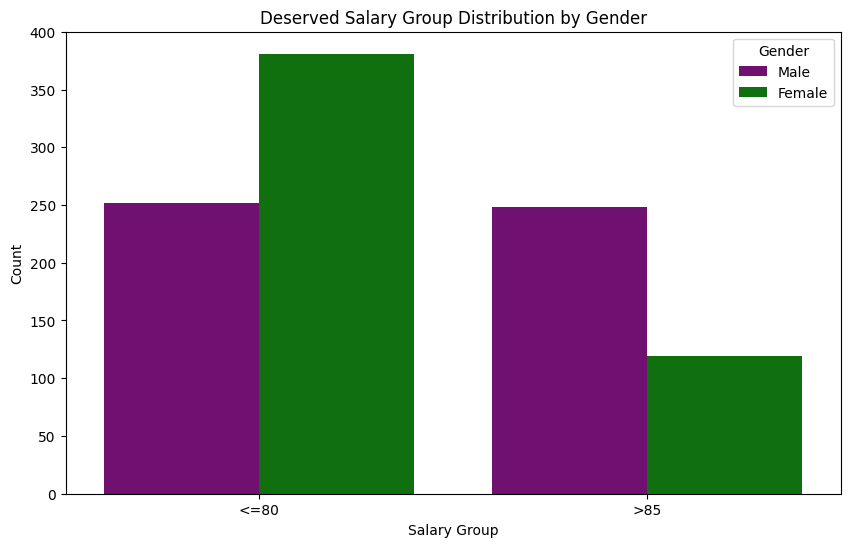

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

long_df = des_cutted_df.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x='salary_group', y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.title('Deserved Salary Group Distribution by Gender')
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.show()

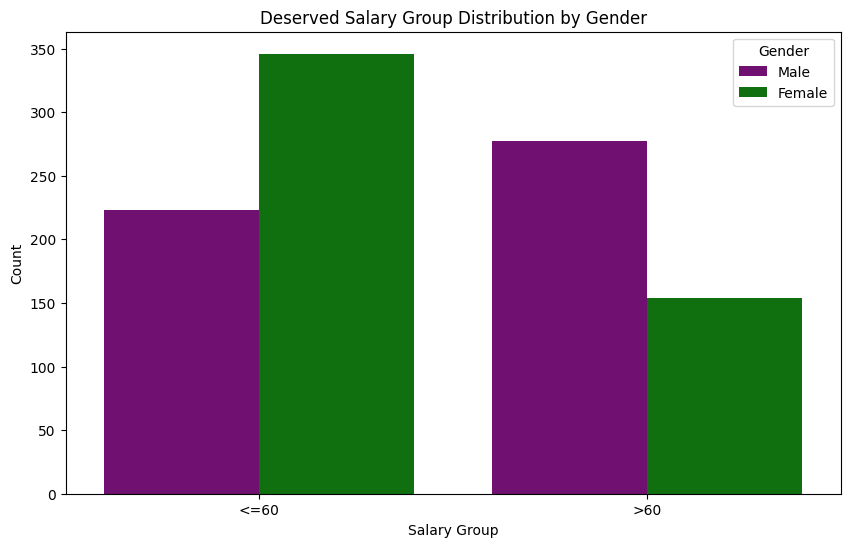

In [22]:
long_df = cur_cutted_df.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x='salary_group', y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.title('Deserved Salary Group Distribution by Gender')
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.show()

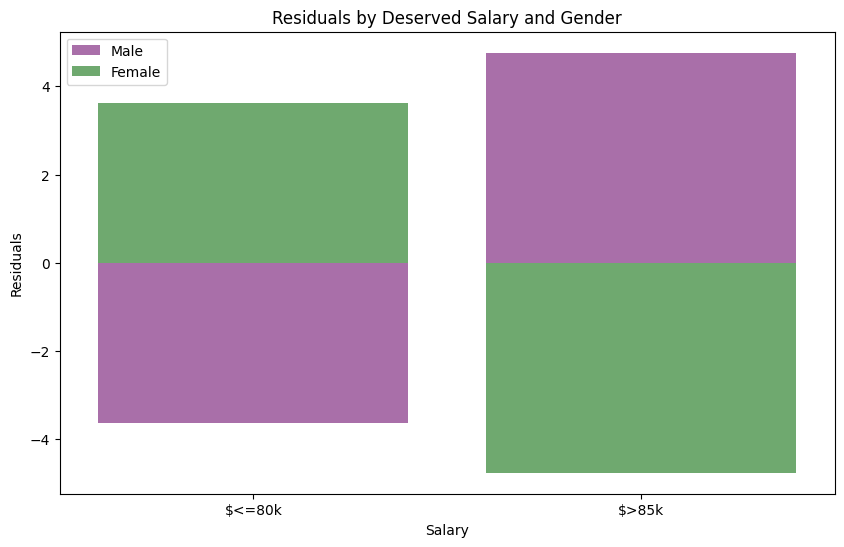

In [23]:

residuals = (observed_deserved - expected_deserved) / np.sqrt(expected_deserved)

ticks = [
    f'${salary}k' for salary in
    des_cutted_df['salary_group'].to_numpy()
    ]
# Extract residuals for each group
male_residuals = residuals[:, 0]
female_residuals = residuals[:, 1]
# neutral_residuals = residuals[:, 2]

plt.figure(figsize=(10, 6))

# Plot each group's residuals
sns.barplot(x=ticks, y=male_residuals, color='purple', label='Male', alpha=0.6)
sns.barplot(x=ticks, y=female_residuals, color='green', label='Female', alpha=0.6)
# sns.barplot(x=ticks, y=neutral_residuals, color='orange', label='Neutral', alpha=0.6)

plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Deserved Salary and Gender')
plt.legend()
plt.show()

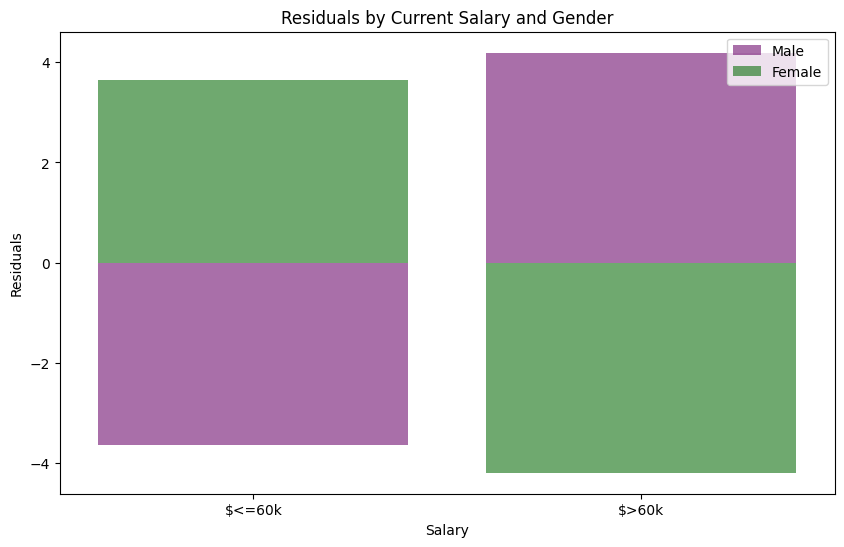

In [24]:
residuals = (observed_current - expected_current) / np.sqrt(expected_current)

ticks = [
    f'${salary}k' for salary in
    cur_cutted_df['salary_group'].to_numpy()
    ]
# Extract residuals for each group
male_residuals = residuals[:, 0]
female_residuals = residuals[:, 1]
# neutral_residuals = residuals[:, 2]

plt.figure(figsize=(10, 6))

# Plot each group's residuals
sns.barplot(x=ticks, y=male_residuals, color='purple', label='Male', alpha=0.6)
sns.barplot(x=ticks, y=female_residuals, color='green', label='Female', alpha=0.6)
# sns.barplot(x=ticks, y=neutral_residuals, color='orange', label='Neutral', alpha=0.6)

plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Current Salary and Gender')
plt.legend()
plt.show()